# Laboratory 5

In this assignment you are going to use two clustering algorithms:

    KMeans
    SoftKMeans

# Лабораторная работа №5

В данной работе вы познакомитесь с двумя алгоритмами кластеризации:

    KMeans
    SoftKMeans

## Clustering use-cases
<b> Automatic labeling </b>
<br>Not all data comes with labels. Imagine you have 1 million images dataset without labels and it takes one hour for a human worker to label 100 images. If you pay 10 dollars per hour then it will take 10.000 human hours and 100.000 dollars to pay. You can parallelize the process but it still takes 100.000 dollars. 
<br>Using clustering you can automatically group your data into categories.

<br><b> Structuring the data and search acceleration </b>
<br>Consider this scenario: You're creating a search engine with a huge list of documents. You can map each document to a vector using such techniques as [`bag of words`](https://en.wikipedia.org/wiki/Bag-of-words_model) or [`TF-IDF`](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). The result would be a bunch of documents sitting in a vector space. So when the user enters a query, you map the query to a vector and then find the closest document vectors to the query. 
<br>Without clustering you would do it a naive way by finding the distance between query and each document which is impractical. 
<br>With clustering you can reduce the search space by finding the closest cluster first and then continue searching in this cluster. This is called `nearest neighbor` search.

<b> Find anomalies in data</b>
<br> Algorithms such as [`density-based spatial clustering of applications with noise (DBSCAN)`](https://scikit-learn.org/stable/modules/clustering.html#dbscan) are designed to find clusters that are closely positioned and mark outliers in datasets. Understanding your anomalous data can help you optimize your existing data collection tools, and lead to more accurate results. 

---

## Когда применять кластеризацию

<b> Автоматическая разметка </b>
<br>Не все данные изначально размечены. Представим что у вас есть набор данных из 1 миллиона изображений без разметки. Для разметки 100 изображений одним человеком требуется один час. Если вы платите 10 долларов за каждый час работы, то разметка всего изображения потребует 10.000 человеко-часов и 100.000 долларов зарплаты. Вы можете оптимизировать данный процесс, однако он все еще будет стоит 100.000 долларов.
<br>Применяя кластеризацию вы можете автоматически сгруппировать данные по категориям

<br><b> Структурирование данных и ускорение поиска </b>
<br>Представим следующий сценарий: вы создаете поисковик с огромным числом документов. Вы моежете ставить каждому документу в соответствие вектор используя техники [`bag of words`](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%88%D0%BE%D0%BA_%D1%81%D0%BB%D0%BE%D0%B2) или [`TF-IDF`](https://ru.wikipedia.org/wiki/TF-IDF). В результате вы получите кучу документов размещенных в векторном пространстве. Когда пользователь введет поисковой запрос, вы трансформируете его в вектор и будете искать наиболее близкий к нему вектор-документ из пространства векторов.
<br>Без кластеризации вы будете считать расстояние между вектором запросом и каждым документом пространства, что не практично.
<br>Применяя кластеризацию вы сможете ускорить поиск, сначала найдя ближайший кластер, а затем начав перебор векторов только из этого кластера. Такой поиск называется `nearest neighbor`

<b> Поиск аномалий в данных</b>
<br> Такие алгоритмы как [`density-based spatial clustering of applications with noise (DBSCAN)`](https://scikit-learn.org/stable/modules/clustering.html#dbscan) были разработаны чтобы находить близко расположенные кластеры и отмечать выбросы в данных. Выявление аномалий в ваших данных может помочь оптимизировать процесс использования данных и привести к более точным результатам.

## K-Means

K-Means is a classical clustering algrithm. `K` stands for K clusters and `means` means (yes) that the cluster center is a *mean (average) point* of the cluster. The steps are the following:

1. Randomly initialize `K` cluster centers.
2. Cluster (label) the data according to the current clusters.
3. Recalculate cluster centers.
4. Do steps 2, 3 until convergence. 

The algorithm is converged when the cluster centers do not change.


---

K-Means - это классический алгоритм кластеризации. Где `K` - количество класстеров и `means` означает что центр кластера - это центральная точка кластера. Далее перечислим шаги алгоритма:

1. Случайным образом инициализировать `K` центров кластеров.
2. Кластеризуем (разметим) данные согласно текущим кластерам.
3. Пересчитаем центры кластеров.
4. Повторять шаги 2 и 3 пока алгоритм не сойдется. 

Алгоритм сошелся если центры кластеров не изменились.


Functions for data visualization

---

Функции для визуализации данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_colored_points(X, colors):
    fig = plt.figure()
    fig.set_size_inches(14, 7)
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.scatter(X[:,0], X[:,1], c=colors)


def plot_cost(cost):
    fig = plt.figure()
    fig.set_size_inches(14, 7)
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.plot(cost)

### K-Means implementation

In [3]:
def dist(x, y):
    """
    Calculates Euclidean distance
    """
    diff = x - y
    dist_2 = np.sum(diff * diff, axis=-1)
    return np.sqrt(dist_2)


def k_means(X, K, max_iter=20):
    # N - number of samples, D - dimensionality (number of features)
    # N - число объектов выборки, D - размерность (число признаков)
    N, D = X.shape
    # Labels
    # Метки
    L = np.zeros(N)
    # Cluster centers
    # Центры кластеров
    M = np.zeros((K, D))
    
    # Randomly initialize the centers of clusters (step 1)
    # Случайная инициализация центров кластеров (шаг 1)
    for k in range(K):
        M[k] = X[np.random.choice(N)]
    
    M_prev = M.copy()
    for i in range(max_iter):
        dists = []
        # Calculate distances from each point to each cluster.
        # Вычисляет расстрояние от каджой точки до каждого кластера
        for k in range(K):
            dists += [dist(X, M[k]).reshape(-1, 1)]
        # dists has shape (K, N, 1)
        # dists имеет следующие размеры (K, N, 1)
        dists = np.hstack(dists) # (K, N, 1) -> (N, K)
        # Find the closest cluster for each point (step 2)
        # Найдем ближайший кластер для каждой точки (шаг 2)
        L = np.argmin(dists, axis=1)
        # Recalculate cluster centers (шаг 3)
        # Пересчитаем центры кластеров (шаг 3)
        for k in range(K):
            M[k] = X[L==k].mean(axis=0)
            
        # Check convergence condition
        # Проверим условие сходимости
        if np.allclose(M, M_prev):
            print(f'KMeans converged on {i}th iteration')
            break
        else:
            M_prev = M.copy()
    
    plot_colored_points(X, L)
    return M, L

KMeans converged on 10th iteration


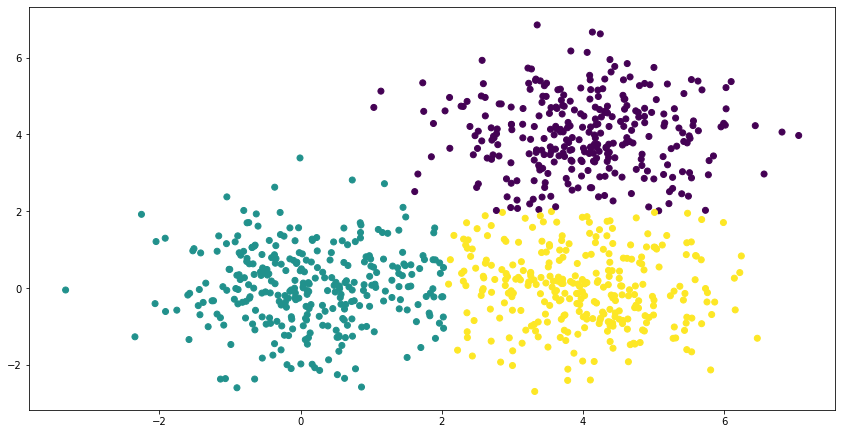

In [4]:
# Toy example of clustering 3 gaussian clouds
mean1 = np.array([0, 0])
mean2 = np.array([4, 0])
mean3 = np.array([4, 4])

N = 900

X = np.random.randn(N, 2)

X[:300] += mean1
X[300:600] += mean2
X[600:] += mean3

labels = [0]*300 + [1]*300 + [2]*300

M, L = k_means(X, K=3)

### Clustering perfomance evaluation

In order to evaluate the perfomance of clustering we need metrics that quantify 'quality of the clusters'. There are two types to do such a evaluation: internal and external.
<br>External evalution quantifies clustering results using the labels (some kind of accuracy), internal evalution does it without ones by looking at the cluster themselves. Internal evalution is the only way to quantify the results when you don't have any labels.

Different metrics are available by the following link: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

---

Для того чтобы оценить качество кластеризации нам нужны метрики оценивающие "качество кластеров". Существует два вида таких метрик: внутрении и внешние.

Внешняя оценка результатов кластеризации использует данные о метках (похоже на оценку точности), внутрняя оценка не использует никакой дополнительной информации. Внутренняя оценка единственный способ оценить качество кластеризации в случаях когда разметка отсутствует.

Различные метрики могут быть найдены по следующей ссылке: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In our case we will use the [purity](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html) as __external__ metric.

---

В данной работе будем использовать [purity](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html) в качестве __внешней__ метрики.

In [5]:
import numpy as np

from sklearn.metrics.cluster import contingency_matrix
from sklearn.utils import shuffle
from scipy.spatial.distance import euclidean 

# External evaluation
def metrics_purity(class_labels, cluster_labels):
    """
    Compute the purity metric for evaluation of clustering.
    
    Parameters
    ----------
    class_labels : ndarray
        Contains true labels. Shape [n_points].
    cluster_labels : ndarray
        Contains clustering labels. Shape [n_points].
        
    Returns
    -------
    float
        Purity metric 
    """
    
    c_m = contingency_matrix(class_labels, cluster_labels)
    return np.sum(np.amax(c_m, axis=0)) / np.sum(c_m)

In [6]:
metrics_purity(labels, L)

0.9655555555555555

In our case we will use the [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index) as __internal__ metric.

---

В данной работе будем использовать [Davies-Bouldin Index (Индекс Дэвиса-Болдина)](https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index) в качестве __внутренней__ метрики.

In [7]:
# Internal evaluation
def metrics_davies_bouldin(X, cluster_labels, distance=euclidean):
    """
    Computes Davies Bouldin Index.
    
    Parameters
    ----------
    X : ndarray
        Data points. Shape [n_points, num_features].
    cluster_labels : ndarray
        Contains clustering labels. Shape [n_points].
    distance : function
        Python function with API: distance(vector_a, vector_b) -> float.
    
    Returns
    -------
    float
        Davies Bouldin Index.
    """
    n_cluster = len(np.bincount(cluster_labels))
    cluster_k = [X[cluster_labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([distance(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append((variances[i] + variances[j]) / distance(centroids[i], centroids[j]))

    return(np.max(db) / n_cluster)

In case of internal evaluation you can judge the results only by comparison.

---

В случаее оценки внутренней метрикой необходимо производить сравнение результатов.

KMeans converged on 9th iteration
Converged: 0.2161349495066706
1 iteration: 0.2330534886766993
2 iteration: 0.24332779340891267
3 iteration: 0.4014593221769278


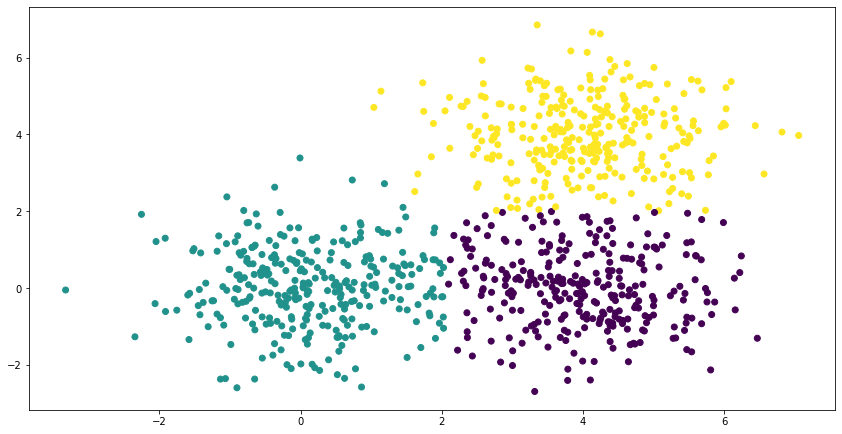

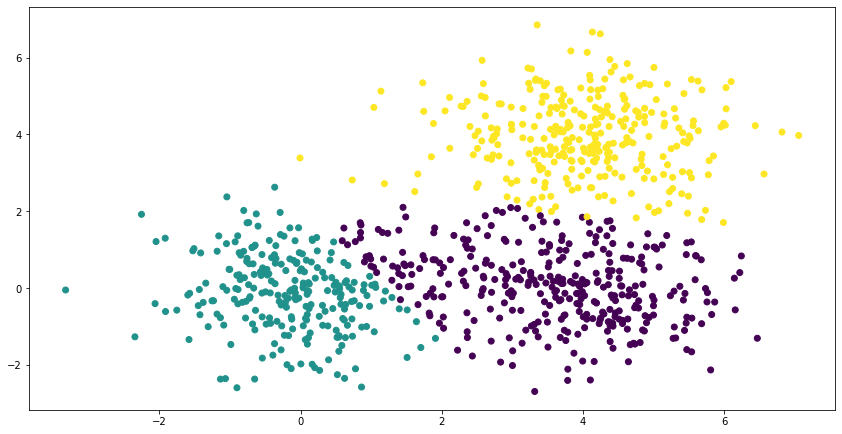

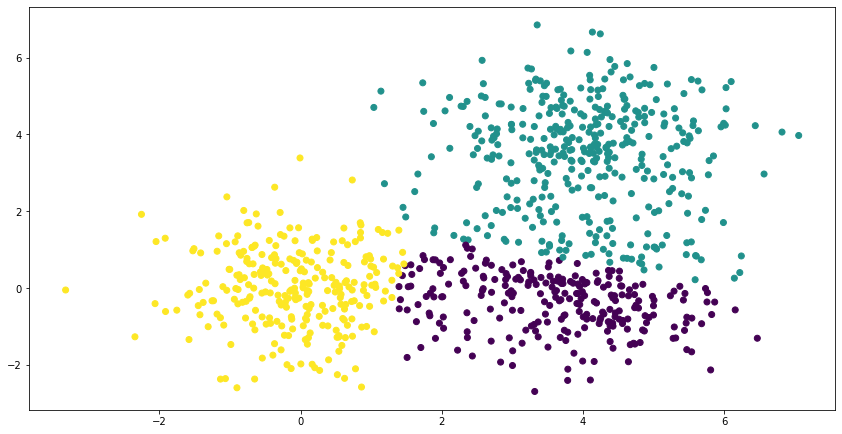

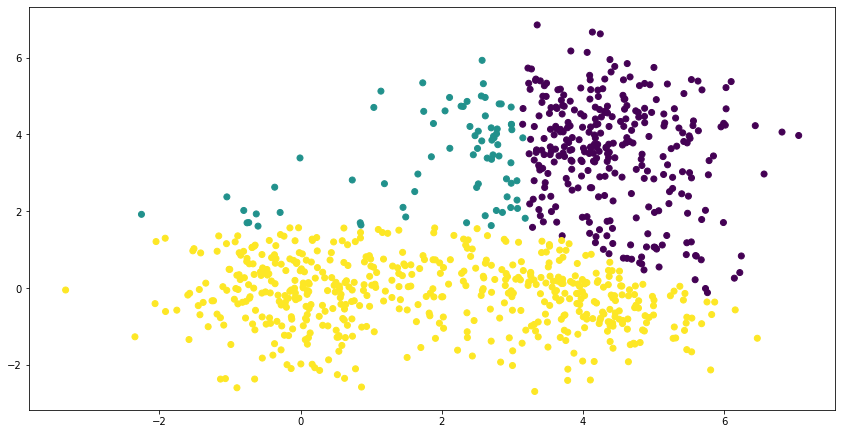

In [8]:
M, L = k_means(X, K=3)
print(f'Converged: {metrics_davies_bouldin(X, L)}')
M, L = k_means(X, K=3, max_iter=1)
print(f'1 iteration: {metrics_davies_bouldin(X, L)}')
M, L = k_means(X, K=3, max_iter=2)
print(f'2 iteration: {metrics_davies_bouldin(X, L)}')
M, L = k_means(X, K=3, max_iter=3)
print(f'3 iteration: {metrics_davies_bouldin(X, L)}')

## Soft K-Means

Soft K-Means is a modification of classical K-Means that allows you to estimate the probability of belonging a point to some cluster. It is also called 'fuzzy clustering'. 

1. Randomly initialize K cluster centers.
2. Calculate cluster responsibilities. Cluster responsibilities are the probabilities of belonging points to each cluster.
3. Recalculate the cluster centers according to the cluster responsibilities.
4. Do steps 2, 3 until convergence. 

The algorithm is converged when the cluster centers do not change (or change very little).

---

Soft K-Means это модификация классического K-Means, которая позволяет оценить вероятность того, что точка принадлежит какому-то кластеру. Этот алгоритм также называется "нечеткой кластеризацией".

1. Случайным образом инициализировать `K` центров кластеров.
2. Вычислим значения принадлоежности точек кластерам. 
3. Пересчитаем центры кластеров в соответствии со значениями принадлежности кластерам.
4. Повторять шаги 2, 3 до схождения алгоритма. 

Алгоритм сошелся если центры кластеров не изменились (или изменились незначительно)


In [9]:
def cluster_resp(distances):
    """
    Function for the calculation of the cluster responsibilities
        
    Larger the distance to cluster `k` - less important the point for the cluster `k`
    Note that this is very similar to the `softmax` function.
    
    Softmax function: https://en.wikipedia.org/wiki/Softmax_function
    
    ---
    
    Функция для вычисления значения принадлежности точек кластерам.
    
    Чем больше расстояние до кластер "к" - тем менее важна данная точка для кластера "к"
    Обратите внимание, данная функция очень похожа на функцию "softmax"
    
    Softmax функция: https://ru.wikipedia.org/wiki/Softmax
    
    """
    d_exp = np.exp(-distances)
    return d_exp / np.sum(d_exp, axis=1, keepdims=True)

In [10]:
def loss(X, M, R):
    """
    Another way of measuring the quality of the clustering results.
    Try to deduce the meaning of this `loss` on your own.
    This measure can be used as a criteria for stopping the algorithm.
    
    ---
    
    Другой способ измерения качества результатов кластеризации
    Постарайтесь самостоятельно понять значение этой функции
    Эта метрика может быть использована в качестве критерия остановки алгоритма
    """
    loss = 0
    for k in range(len(M)):
        d = dist(X, M[k])
        loss += np.sum(R[:,k] * (d * d))
    return loss

In [11]:
def soft_k_means(X, K, max_iter=20):
    # N - number of samples, D - dimensionality (number of features)
    # N - число объектов выборки, D - размерность (число признаков)
    N, D = X.shape
    # Responsibility matrix.
    # R[i, j] = probability that point `i` belongs to cluster `j` 
    # or responsibility of the cluster `j` for the point `i`.
    # Матрица принадлежности.
    # R[i, j] = вероятность того что `i` точка принадлежит кластеру `j`
    # или пренадлежность кластера `j` точке `i`
    R = np.zeros((N, K))
    # Cluster centers
    # Центры кластеров
    M = np.zeros((K, D))
    
    # Loss array
    # Массив значений ошибок
    losses = []
    
    # Randomly initialize the centers (step 1)
    # Случайная инициализация центров кластеров (шаг 1)
    for k in range(K):
        M[k] = X[np.random.choice(N)]
    
    for i in range(max_iter):
        dists = []
        # Calculate distances from each point to each cluster.
        # Вычисляет расстрояние от каджой точки до каждого кластера
        for k in range(K):
            dists += [dist(X, M[k]).reshape(-1, 1)]
        # dists has shape (K, N, 1)
        # dists имеет следующие размеры (K, N, 1)
        dists = np.hstack(dists) # (K, N, 1) -> (N, K)
        
        # Calculate cluster responsibilities (step 2)
        # Вычислим значения принадлежностей точек кластерам (шаг 2)
        R = cluster_resp(dists)
        
        # Recalculate cluster centers (step 3)
        # Пересчитаем центры кластеров (шаг 3)
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()
            
        losses.append(loss(X, M, R))
            
        # Check convergence condition
        # Проверим условие сходимости
        if len(losses) > 2 and np.abs(losses[-1] - losses[-2]) < 1e-6:
            print(f'KMeans converged on {i}th iteration')
            break
        
    plot_cost(losses)
    colors = np.random.random((K,3))
    p_colors = R.dot(colors)
    plot_colored_points(X, p_colors)
    return M, R, losses

KMeans converged on 22th iteration


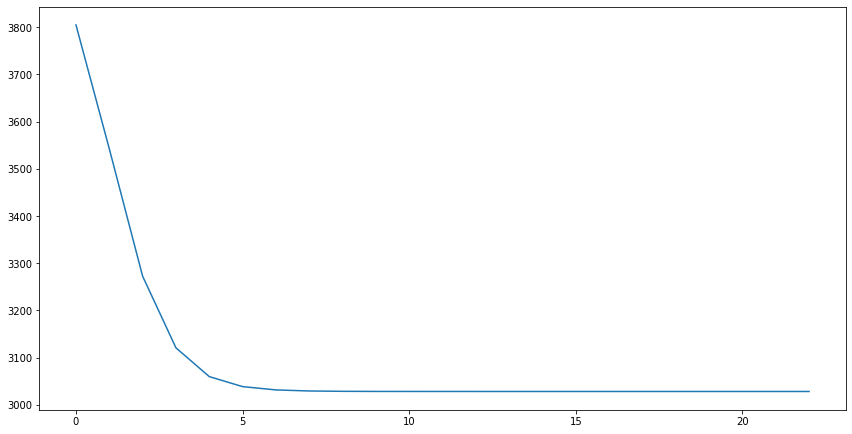

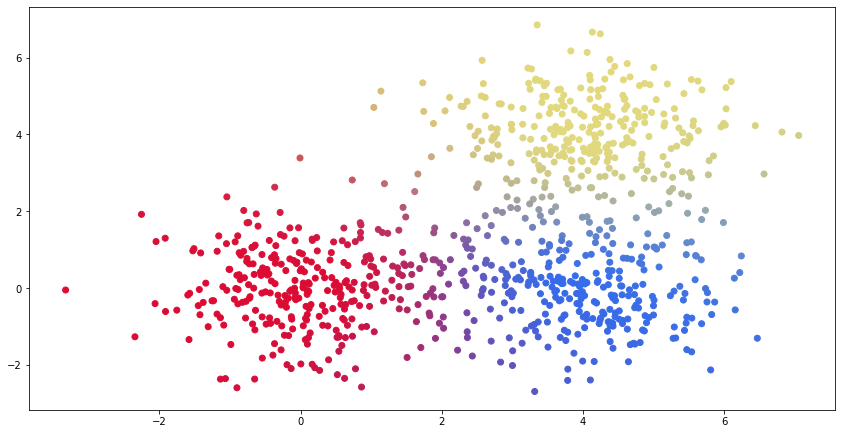

In [12]:
M, R, losses = soft_k_means(X, K=3, max_iter=100)

In [13]:
L = np.argmax(R, axis=1)
print(f'Purity: {metrics_purity(labels, L)}')
print(f'DBI: {metrics_davies_bouldin(X, L)}')

Purity: 0.9611111111111111
DBI: 0.2161659551380453


K-Means result is highly dependent on the initial values of the cluster centers, so you can try other ways of initializing.

---

Результаты K-Means сильно зависят от изначальных значений центров кластеров. Вы можете попробовать свои способы инициализации центров.

## Assignment

Perform clustering for data of your variant using K-Means and its 'soft' version. Find the number of clusters that yields the highest _purity_, use different distance metrics: euclidean distance, manhattan distance, сhebyshev distance. Plot the graphs of purity and DBI values depending on the `K` (number of clusters) for each of the distance metrics.

### Upon the completion of the assignment, the following must be done

1. DataFrame with purity and DBI for each distance metric for the best `K` parameter.
2. Figures show the relationship between the purity and `K`, DBI and `K`.
3. Visualize clustering result of your best model.

Data is available at the following link: 
https://beryl.ssau.ru/nextcloud/index.php/s/62ss9Pa9FdpECrt

---
## Задание

Выполнить кластеризацию данных вашего варианта использовав K-Means и его "soft" версию. Найти число кластеров при котором достигается наибольшее значение _purity_ для различных метрик расстояния: евклидово расстояние, манхэттенское расстояние, расстояние чебышева. Нарисовать графики метрик _purity_ и _DBI_ в зависимости от числа кластеров `K` для каждой из метрик расстояния. 


### Результаты, которые необходимо получить в итоге:

1. DataFrame с признаками и их информативностью, отсортированный по убыванию.
2. Графики, показывающие результат оценки зависимости точности модели и числа выбранных признаков.
3. Визуализировать результаты кластеризации вашей лучшей модели.

Данные доступны по следующей ссылке:
https://beryl.ssau.ru/nextcloud/index.php/s/62ss9Pa9FdpECrt
